In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('cleaned.cvs')


In [22]:
df = df.drop('Unnamed: 0',axis=1)
df.head(2)


,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False


In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [24]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1001)

In [26]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
model = ElasticNet()

In [28]:
param_grid = {'alpha':[1,5,10,20,30,40,70,80,100],'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1]}
scoring = {
    'MAE': 'neg_mean_absolute_error',  # MAE as a negative score
    'RMSE': 'neg_root_mean_squared_error'  # RMSE as a negative score
}

In [29]:
gridcv_model = GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5)

In [30]:
gridcv_model.fit(x_train, y_train)

c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+11, tolerance: 1.019e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+11, tolerance: 1.023e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\AKHIL AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 5, 10, 20, 30, 40, 70, 80, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_absolute_error')

In [31]:
gridcv_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [32]:
y_predict = gridcv_model.predict(x_test)


In [33]:
np.sqrt(mean_squared_error(y_test,y_predict))

23343.28027786668

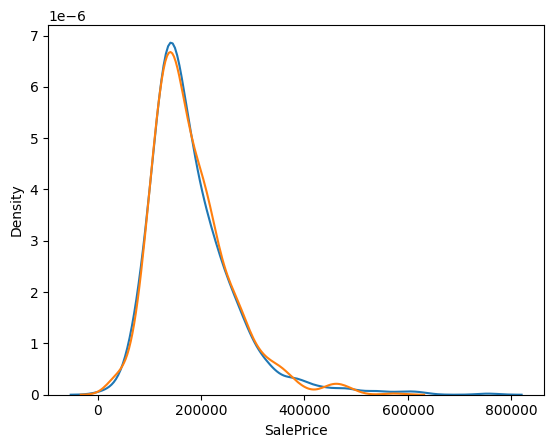

In [34]:
sns.kdeplot(y_test)
sns.kdeplot(y_predict)
plt.show()

In [35]:
mean_absolute_error(y_test,y_predict)

15191.901609280747